In [45]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection  import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.cluster import KMeans

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

import warnings
warnings.filterwarnings("ignore")

In [46]:
#Reading csv file of IRIS
data = pd.read_csv('IRIS.csv')

In [47]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
data.isna().sum().sum()  

0

In [49]:
Species = data['species'].value_counts().reset_index()
Species

,species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


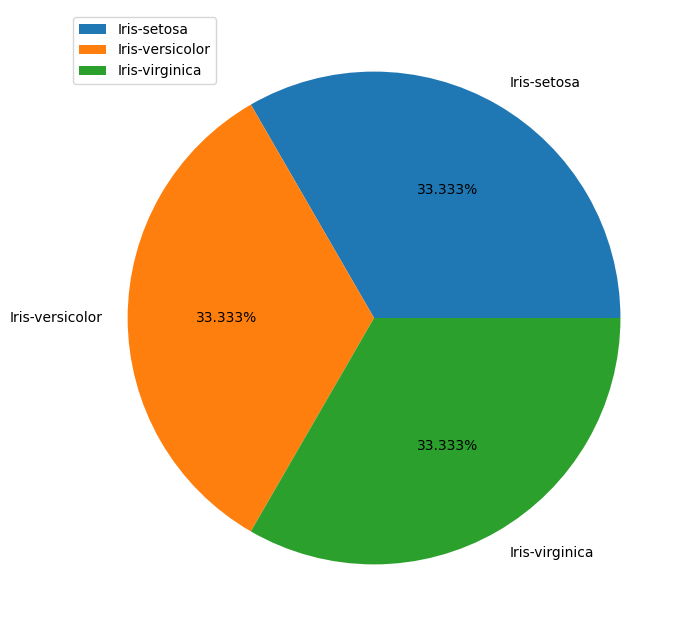

In [50]:
plt.figure(figsize=(8,8))
plt.pie(Species['count'],labels=['Iris-setosa','Iris-versicolor','Iris-virginica'],autopct='%1.3f%%',explode=[0,0,0])
plt.legend(loc='upper left')
plt.show()

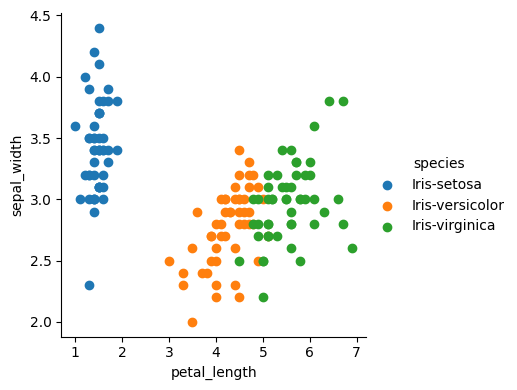

In [51]:
#Scatter plot of different species
sns.FacetGrid(data, hue ='species', height = 4).map(plt.scatter,"petal_length","sepal_width").add_legend()
plt.show()

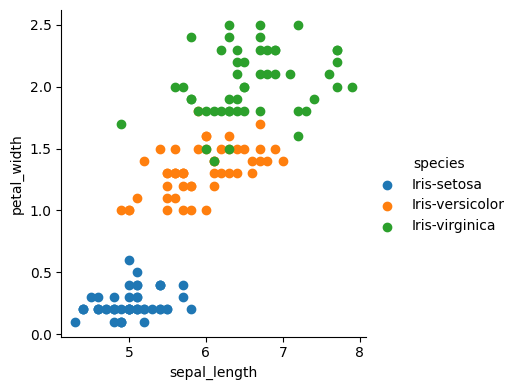

In [52]:
#Scatter plot of different species
sns.FacetGrid(data, hue ='species', height = 4).map(plt.scatter,"sepal_length","petal_width").add_legend()
plt.show()

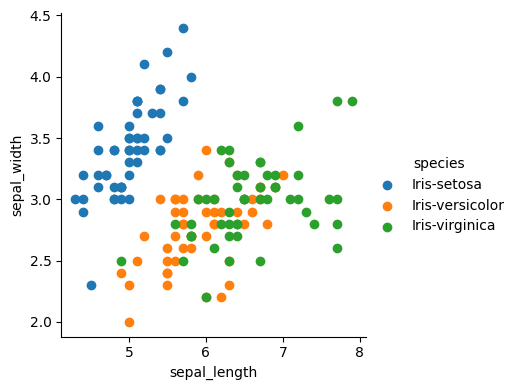

In [53]:
#Scatter plot of different species
sns.FacetGrid(data, hue ='species', height = 4).map(plt.scatter,"sepal_length","sepal_width").add_legend()
plt.show()

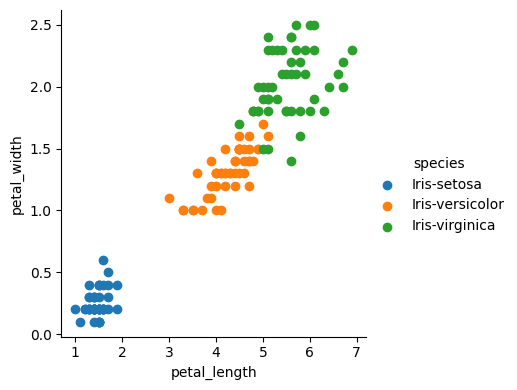

In [54]:
#Scatter plot of different species
sns.FacetGrid(data, hue ='species', height = 4).map(plt.scatter,"petal_length","petal_width").add_legend()
plt.show()

In [55]:
fig = px.scatter_3d(data, x='sepal_length', y='petal_width', z='petal_length', color='species')
fig.show()

In [57]:
X = data.drop('species', axis =1)
Y = data['species']

In [58]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [60]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [61]:
encoder = LabelEncoder()
Y = encoder.fit_transform(y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

In [63]:
def evaluate(model):
  model.fit(X_train,Y_train)
  pre = model.predict(X_test)
  accuracy = accuracy_score(pre,Y_test)
  sns.heatmap(confusion_matrix(pre,Y_test),annot=True)
  print(model)
  print('Accuracy : ',accuracy)

In [64]:
model_LR = LogisticRegression()

LogisticRegression(C=1000.0, random_state=42)
Accuracy :  1.0


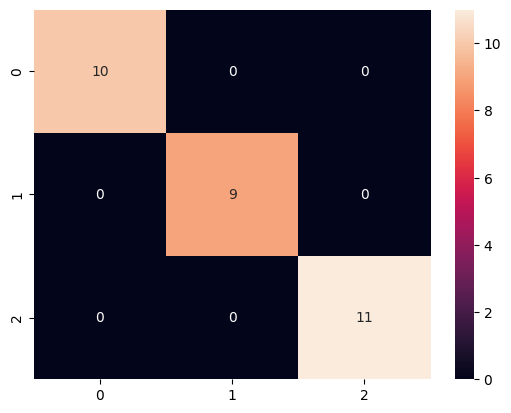

In [65]:
lsr_best = LogisticRegression(penalty='l2',C=1000.0,random_state = 42)
lsr_clf = lsr_best.fit(X_train,y_train)
evaluate(lsr_clf)

In [66]:
model_KNN = KNeighborsClassifier()

In [67]:
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
for k in k_range:
  model_KNN  = KNeighborsClassifier(n_neighbors=k)
  model_KNN .fit(X_train,y_train)
  score = cross_val_score(model_KNN , X_train, y_train, cv=3, n_jobs = -1)
  scores.append(score.mean())
#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]

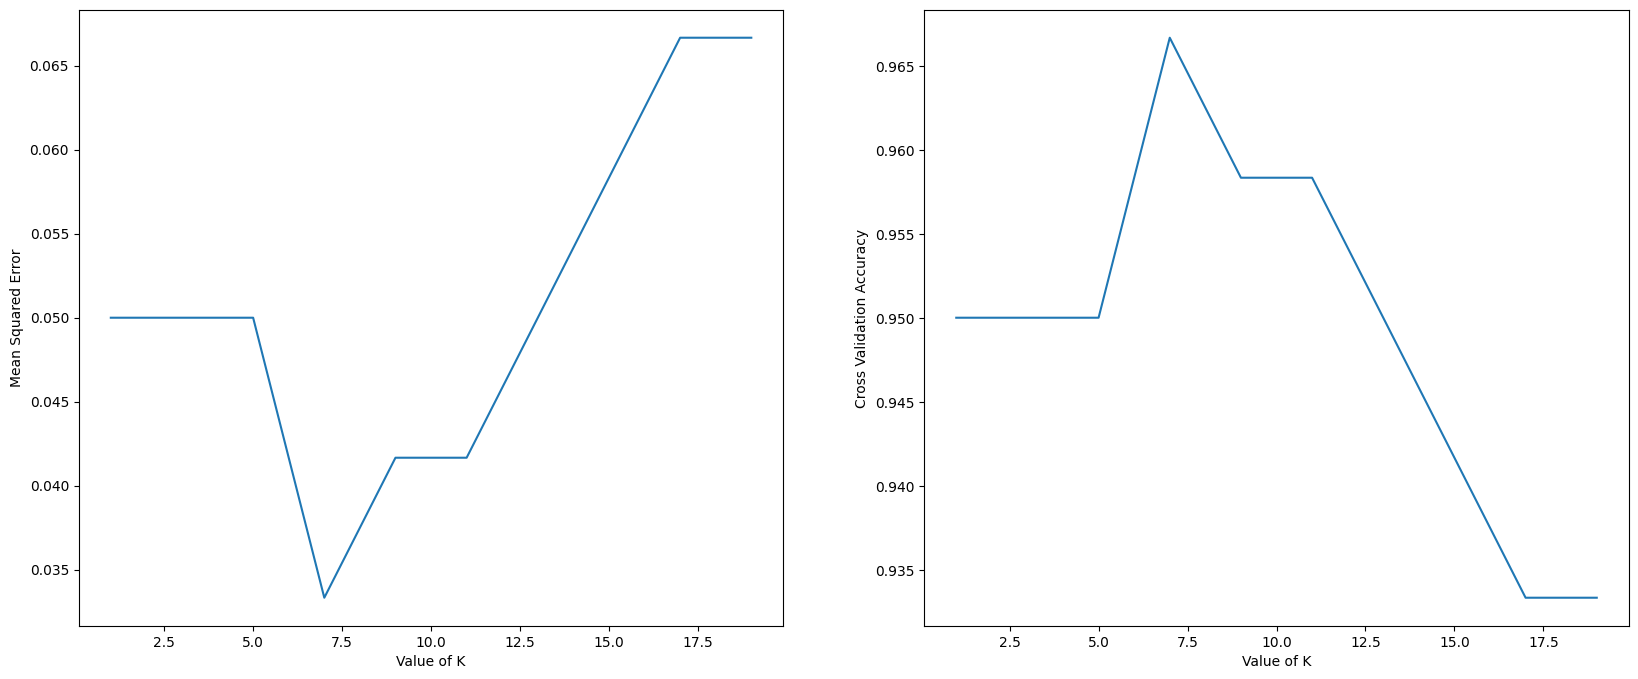

In [68]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(x=k_range,y=mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(x=k_range,y=scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")
plt.show()

KNeighborsClassifier(n_neighbors=7)
Accuracy :  1.0


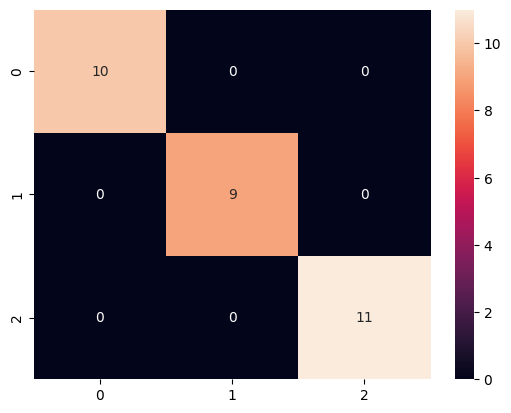

In [69]:
knn = KNeighborsClassifier(n_neighbors=7)
knn_clf = knn.fit(X_train,y_train)
evaluate(knn_clf)

In [70]:
model_RFC = RandomForestClassifier()

RandomForestClassifier(max_depth=9, n_estimators=50)
Accuracy :  1.0


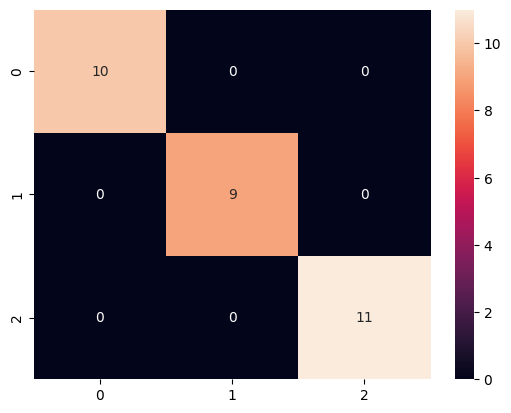

In [71]:
rf = RandomForestClassifier(max_depth=9, n_estimators=50)
RFC_clf = rf.fit(X_train,y_train)
evaluate(RFC_clf)

In [72]:
model_SVM = SVC()

SVC()
Accuracy :  1.0


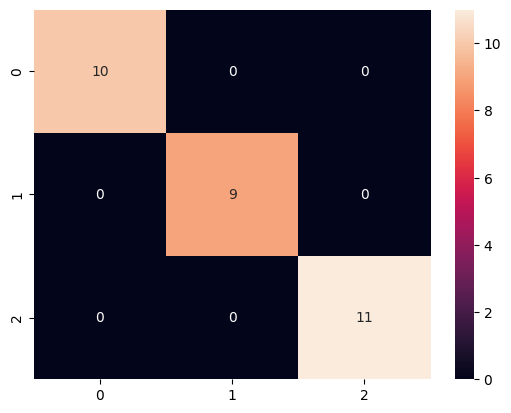

In [73]:
svc = SVC()
svc_clf = svc.fit(X_train, y_train)
evaluate(svc_clf)

In [74]:
model_DT = DecisionTreeClassifier()

SVC()
Accuracy :  1.0


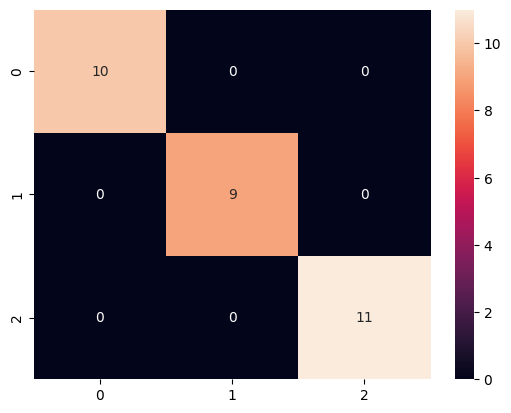

In [75]:
DT = model_DT.fit(X_train, y_train)
evaluate(svc_clf)

In [76]:
model_ANN = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),

    Dense(64, activation='relu'),
    
    Dense(32, activation='relu'),
    
    Dense(16, activation='relu'),
    
    Dense(8, activation='relu'),
    
    Dense(3, activation='softmax')
])

model_ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_ANN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,667 (45.57 KB)

 Trainable params: 11,667 (45.57 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
history = model_ANN.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.6875 - loss: 1.0833 - val_accuracy: 0.7500 - val_loss: 1.0447
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6667 - loss: 1.0490 - val_accuracy: 0.6667 - val_loss: 1.0171
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7305 - loss: 1.0201 - val_accuracy: 0.6250 - val_loss: 0.9880
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7500 - loss: 0.9898 - val_accuracy: 0.6250 - val_loss: 0.9548
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7526 - loss: 0.9559 - val_accuracy: 0.6250 - val_loss: 0.9179
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7214 - loss: 0.9214 - val_accuracy: 0.6667 - val_loss: 0.8825
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7214 - loss: 0.8820 - val_accuracy: 0.5833 - val_loss: 0.8495
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7448 - loss: 0.8499 - val_accuracy: 0.6250 - val_loss: 0.8138


In [78]:
#Finding the optimum number of clusters for k-means classification
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

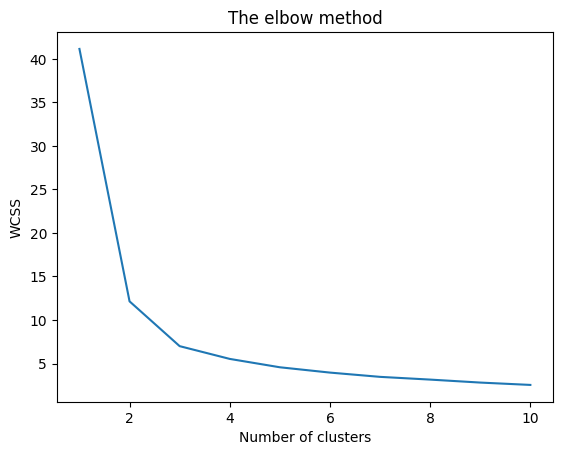

In [79]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [80]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
Y_kmeans = kmeans.fit_predict(X)

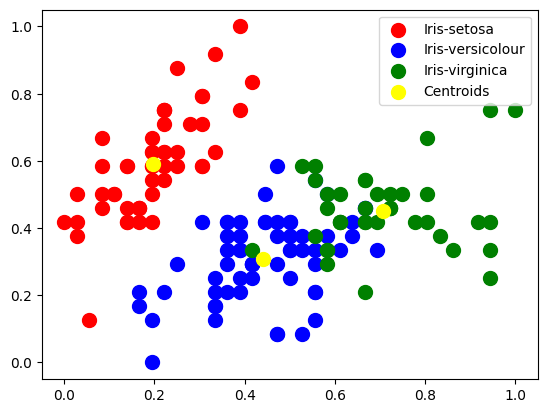

In [81]:
plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()